# Answers
# Using a mask

## Pair programming: part 2


## Masking a galaxy

One application for using a geometrical mask, like you have been developing, is when looking at images containing real objects like galaxies. In this case we have accessed a galaxy image as a png file. In reality, there are more specific file formats traditionally used to store this type of astronomical data but the principle is similar.

We can open the image of the galaxy using the following code. This uses a module called `pillow` (imported as `PIL`) which understands how to read image files and we can import the `Image` sub-module to open this file. We can convert that image into a `numpy` `array` object.

In [1]:
from PIL import Image
import numpy as np

im_filename = "ngc253_small.png"
im = np.array(Image.open(im_filename))

If we look at the shape of this image data we can see that is is 3D - it has height and width but also three entries for colour: Red, Green and Blue (RGB).

In [2]:
print(im.shape)

(907, 1000, 3)


As we did when plotting the mask, we can use a `matplotlib` function called `imshow()` to display this image, but this time it knows how to interpret the three colour channels to display an image with colour.

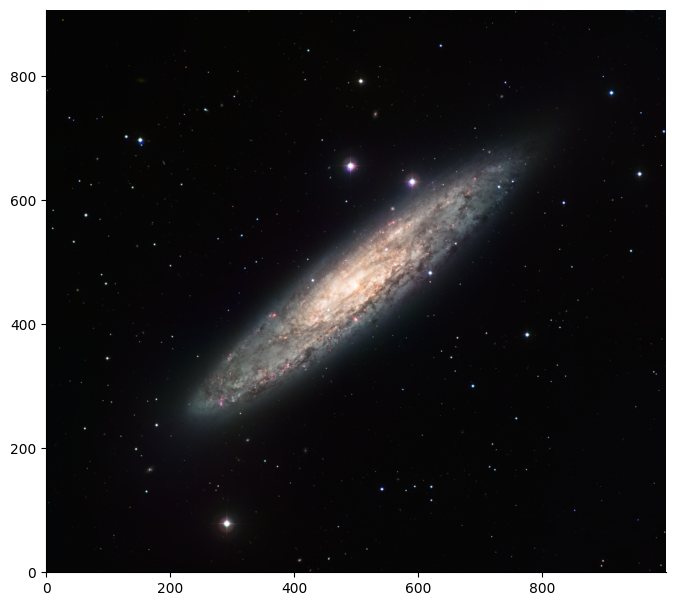

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(im, origin="lower")

This is sprial galaxy [NGC 253](https://www.eso.org/public/images/eso0902a/), also known as the Sculpter Galaxy. If we wanted to mask this image so that only the pixels related to the galaxy remain, we can do so using a geometrical mask for an ellipse - similiar to the circular mask you have been developing but with a few additional parameters needed.

## Creating an elliptical mask

The `inside_ellipse` function defined below will allow you to check whether an (x, y) value is inside an ellipse with the supplied parameters. As we've seen in previous weeks, functions can be used to avoid having to repeat code. 

In [4]:
def inside_ellipse(x, y, centre=(0,0), a=2, b=1, alpha=0):
    
    x0,y0 = centre
    
    # Convert alpha in degrees to radians for use with cos/sin function
    alpha_rad = np.radians(alpha)
    
    term1 = ((x-x0)*np.cos(alpha_rad) + (y-y0)*np.sin(alpha_rad))**2 / a**2
    term2 = ((x-x0)*np.sin(alpha_rad) - (y-y0)*np.cos(alpha_rad))**2 / b**2
    
    total = term1 + term2

    return total<1

### Equations for an ellipse

To understand the parameters that can be passed to the `inside_ellipse()` function we need to consider the form of an ellipse. The equation govering the edge of an ellipse is similiar to a circle but instead of one radius, $r$, there are now two parameters $a$ and $b$ defined as the semi-major and semi-minor axes (naming can be the other way round depending on which is larger).

For an ellipse centred at ($x_{0}$, $y_{0}$) and with the semi-major axis parallel to the x-axis the equation of the edge of the ellipse would be:

$$ \frac{(x-x_0)^2}{a^2} + \frac{(y-y_0)^2}{b^2} = 1 $$

This would look something like:

<img src="images/Ellipse_illustration_no-angle.png" alt="Ellipse" style="width:30%"/>

However, for our example we also need to consider an ellipse at an angle away from the x-axis, alpha ($\alpha$). The edge for this ellipse can be calculated using the full equation:

$$ \frac{((x-x_0)\cos\alpha + (y-y_0)\sin\alpha)^2}{a^2} + \frac{((x-x_0)\sin\alpha - (y-y_0)\cos\alpha)^2}{b^2} = 1 $$

This would look like:

<img src="images/Ellipse_illustration_with-angle.png" alt="Ellipse at an angle" style="width:30%"/>


The parameters needed to use `inside_ellipse` function are: the centre of the ellipse, the semi-major and semi-minor axes and the angle, $\alpha$. For example:

In [5]:
x1 = 0
y1 = 0
position_is_in_ellipse1 = inside_ellipse(x1, y1, centre=(0, 0), a=2, b=1, alpha=0)
print(f"Is position ({x1}, {y1}) inside the ellipse? {position_is_in_ellipse1}")

x2 = 0
y2 = 4
position_is_in_ellipse2 = inside_ellipse(x2, y2, centre=(0, 0), a=2, b=1, alpha=0)
print(f"Is position ({x2}, {y2}) inside the ellipse? {position_is_in_ellipse2}")

Is position (0, 0) inside the ellipse? True
Is position (0, 4) inside the ellipse? False


---

### Exercise B

For our example of the galaxy the parameters for a suitable ellipse are as follows:

 - centre position $x_0$, $y_0$ at (500, 470)
 - semi-major axis, $a$, of 365
 - semi-minor axis, $b$, of 70
 - angle alpha, $\alpha$, of 38 degrees

1. Use the `inside_ellipse` function to create an elliptical mask which could be used to mask the galaxy image so only the galaxy is included.
2. Apply this mask to each of the (R, G, B) channels of the image `im` (recall this is a 3D `np.array` object). Call the masked image `im_masked`.

As above, you can use the plotting code below which uses the `matplotlib` function `imshow()` to plot the 3D `im_masked` object as a colour image (or to plot a 2D image for one colour channel).

In [11]:
# ADD CODE HERE
rows, cols = np.indices((im.shape[0], im.shape[1]))
centre = (500,470)
a = 365
b = 70
alpha = 33
mask = inside_ellipse (cols, rows, centre, a, b , alpha)

im_masked = im.copy()
im_masked[np.logical_not(mask),:] = 0 # you can use ~ instead of the logical_not function

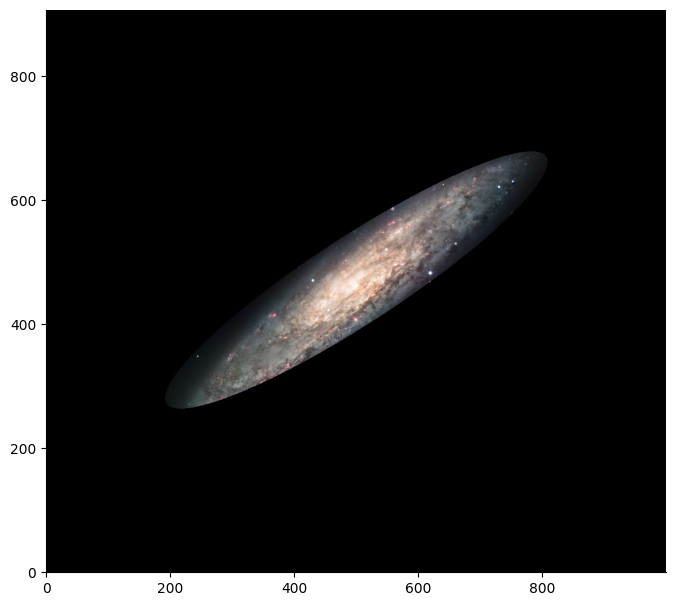

In [12]:
# UNCOMMENT THIS CODE TO PLOT YOUR MASKED IMAGE

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(im_masked.astype(int),origin="lower")

## Calculating the magnitude

Now that we have masked out just the pixels related to the galaxy, one parameter we can derive is to calculate the galaxy brightness for a particular colour. Normally, this would not be done from an RGB image but we can use this to make an approximation.

The magnitude of an object is given by the equation:

$$ m_{AB} = -2.5\log_{10}(f_v) + 8.90 $$

where:
 - $m_{AB}$ is the magnitude (on the AB scale)
 - $f_v$ is the spectral flux density (in units of Jansky, $Jy$)

---

### Exercise C

We can calculate an approximation of the spectral flux density, $f_{v}$, by **summing the pixel values** from our image and by applying a scale factor of $2.8\times10^{-7}$.

From your masked image of the galaxy, and using the details above, calculate an approximation of the magnitude of the Blue channel (the third channel) from this image.

How does this compare to the true value for "B (AB)"? - available here: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC+253&jsessionid=262A420D60A8A4D72D3384528AA0980A.main

Hint:
  - Additional `numpy` functions which will be useful:
    - `sum()` - https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    - `log10()` - https://numpy.org/doc/stable/reference/generated/numpy.log10.html     

In [8]:
# ADD CODE HERE

# Select the third channel (B) and calculate the sum
im_B_channel = im_masked[:, :, 2]
summed_B = np.sum(im_B_channel)

# Apply the scale factor to get approximated flux value
scale_factor = 2.8e-7
flux_scaled_B = summed_B*scale_factor

# Calculate the magnitude using the np.log10 function
magnitude_B = -2.5*np.log10(flux_scaled_B) + 8.90
print(magnitude_B)

8.020321602071416


---